In [ ]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import io

In [ ]:
#import csv file
from google.colab import files
uploaded = files.upload() #Note that the csv file is uploaded from personal laptop

Saving corrupteddata.csv to corrupteddata.csv


In [ ]:
#original corrupted data
ori_data = pd.read_csv(io.BytesIO(uploaded['corrupteddata.csv'])) #Note that the name of the csv file here matches the one uploaded before
print(ori_data)

     Unnamed: 0         0         1  ...       497       498       499
0             0  0.658807  0.645565  ...  0.684739  0.671868  0.658807
1             1  0.659458  0.646216  ...  0.685391  0.672519  0.659458
2             2  0.660030  0.646788  ...  0.685963  0.673092  0.660030
3             3  0.660523  0.647282  ...  0.686456  0.673585  0.660523
4             4  0.660938  0.647696  ...  0.686870  0.673999  0.660938
..          ...       ...       ...  ...       ...       ...       ...
495         495  0.655415  0.642174  ...  0.681348  0.668477  0.655415
496         496  0.656381  0.643139  ...  0.682314  0.669442  0.656381
497         497  0.657268  0.644027  ...  0.683201  0.670330  0.657268
498         498  0.658077  0.644835  ...  0.684010  0.671138  0.658077
499         499  0.658807  0.645565  ...  0.684739  0.671868  0.658807

[500 rows x 501 columns]


In [ ]:
#remove the first column (garbage)
ori_data = ori_data.drop(columns=['Unnamed: 0'])

In [ ]:
#replace "0" with "NaN" in ori_data
ori_data = ori_data.replace(0, np.nan)

#Check how many NaN are present in the data before data cleaning by cubic spline interpolation
print(ori_data.isnull().sum().sum())

4790


In [ ]:
#use cubic spline interpolation method to get rid of "NaN" in data
new_data = ori_data.interpolate(method='cubicspline')
print(new_data)

#Check how many NaN are present in the data after data cleaning by cubic spline interpolation
print(new_data.isnull().sum().sum())

            0         1         2  ...       497       498       499
0    0.658807  0.645565  0.632154  ...  0.684739  0.671868  0.658807
1    0.659458  0.646216  0.632805  ...  0.685391  0.672519  0.659458
2    0.660030  0.646788  0.633377  ...  0.685963  0.673092  0.660030
3    0.660523  0.647282  0.633870  ...  0.686456  0.673585  0.660523
4    0.660938  0.647696  0.634284  ...  0.686870  0.673999  0.660938
..        ...       ...       ...  ...       ...       ...       ...
495  0.655415  0.642174  0.628762  ...  0.681348  0.668477  0.655415
496  0.656381  0.643139  0.629728  ...  0.682314  0.669442  0.656381
497  0.657268  0.644027  0.630615  ...  0.683201  0.670330  0.657268
498  0.658077  0.644835  0.631424  ...  0.684010  0.671138  0.658077
499  0.658807  0.645565  0.632154  ...  0.684739  0.671868  0.658807

[500 rows x 500 columns]
0


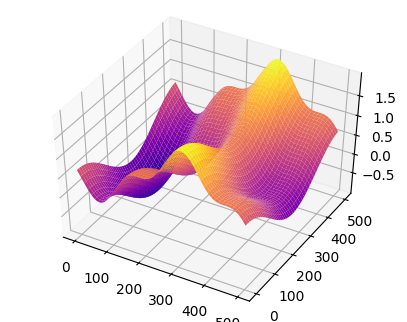

In [ ]:
#Plot of the new data frame
xls, yls = np.meshgrid(np.arange(new_data.shape[0]),np.arange(new_data.shape[0]))
fig = plt.figure(figsize=(5,4),dpi=100)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xls, yls, new_data, cmap='plasma')
ax.view_init(45)